# **Gold Price Prediction**

## Importing the library's

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Reading the data**

In [6]:
df = pd.read_csv('/content/Gold_data.csv', header=0, index_col=0,parse_dates=True)
df.head()

,price
date,
01-01-2016,2252.60
02-01-2016,2454.50
03-01-2016,2708.10
04-01-2016,2577.80
05-01-2016,2597.75


In [7]:
df.tail()

,price
date,
17-12-2021,4394.4
18-12-2021,4389.5
19-12-2021,4389.5
20-12-2021,4354.1
21-12-2021,4346.5


In [8]:
df.columns

Index(['price'], dtype='object')

In [9]:
df.shape

(2182, 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 01-01-2016 to 21-12-2021
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1+ KB


In [11]:
df.index

Index(['01-01-2016', '02-01-2016', '03-01-2016', '04-01-2016', '05-01-2016',
       '06-01-2016', '07-01-2016', '08-01-2016', '09-01-2016', '10-01-2016',
       ...
       '12-12-2021', '13-12-2021', '14-12-2021', '15-12-2021', '16-12-2021',
       '17-12-2021', '18-12-2021', '19-12-2021', '20-12-2021', '21-12-2021'],
      dtype='object', name='date', length=2182)

## **checking the null values**

In [12]:
df.isnull().sum()

,0
price,0


In [13]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [14]:
df.duplicated().sum()

np.int64(306)

In [15]:
df=df.rename(columns={'Date':'date','Price':'price'})

In [16]:
df

,price
date,
01-01-2016,2252.60
02-01-2016,2454.50
03-01-2016,2708.10
04-01-2016,2577.80
05-01-2016,2597.75
...,...
17-12-2021,4394.40
18-12-2021,4389.50
19-12-2021,4389.50


## **plotting** **the** **line** **lot**

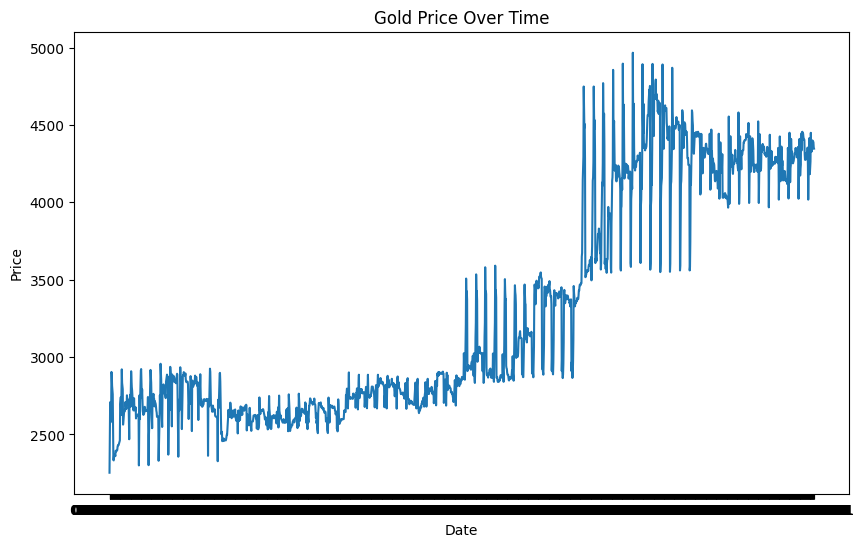

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## **Boxplot**

In [18]:
import plotly.express as px

In [19]:
fig = px.box(df, y="price", points="all")
fig.update_traces(marker=dict(color='lightblue'))

fig.update_layout(
    xaxis_title="Gold Price",
    yaxis_title="Frequency",
    title="Box Plot of Gold Price"
)
fig.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
result = adfuller(df['price'])
result = adfuller(df['price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:',result[4])




if result[1] <= 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')

ADF Statistic: -0.309904
p-value: 0.924090
Critical Values: {'1%': np.float64(-3.4333881004322455), '5%': np.float64(-2.8628821222065013), '10%': np.float64(-2.5674844795732152)}
The time series is non-stationary


In [22]:
import plotly.express as px

In [23]:
df = df.reset_index()


## KDE plot

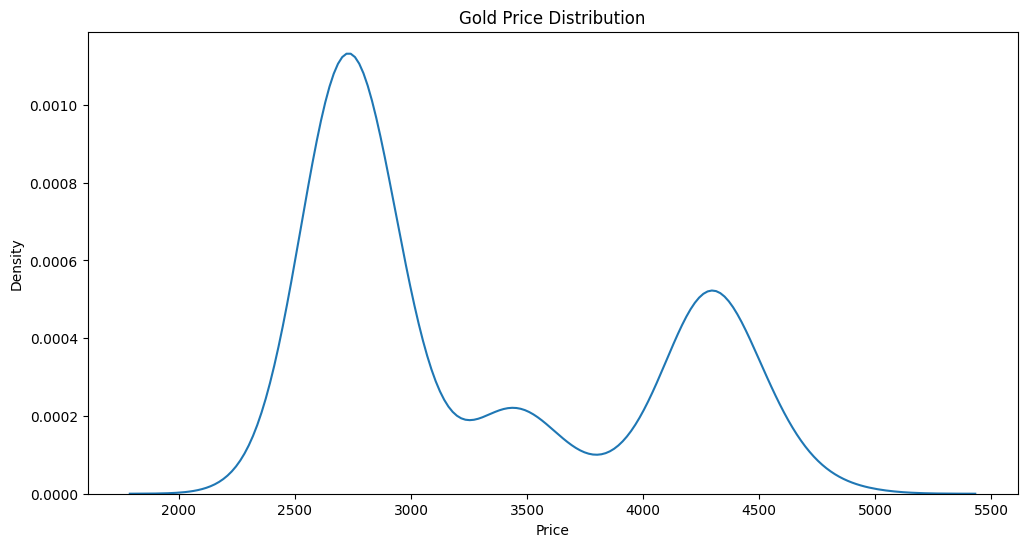

In [24]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price'])
plt.title('Gold Price Distribution')
plt.xlabel('Price')
plt.show()

In [25]:
from pandas.plotting import lag_plot



In [26]:
px.scatter(df,x=df.index,y='price')

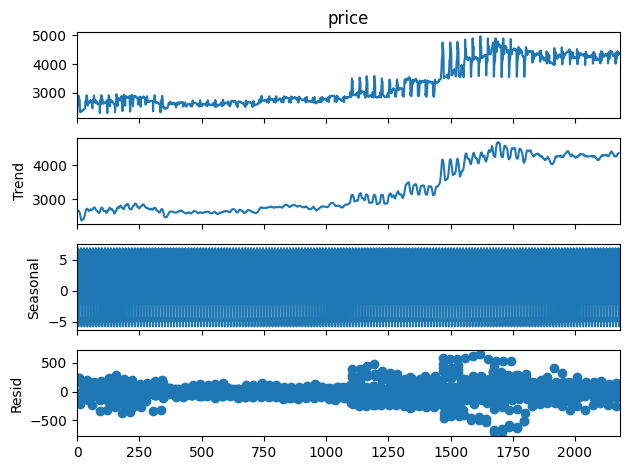

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

DecomposeResult = seasonal_decompose(df['price'], model='additive', period=12)
DecomposeResult.plot()
plt.show()

In [28]:
df['Daily_Change'] = df['price'].diff()

# Label increases/decreases
df['Trend'] = 'Neutral'
df.loc[df['Daily_Change'] > 0, 'Trend'] = 'Increasing'
df.loc[df['Daily_Change'] < 0, 'Trend'] = 'Decreasing'

print(df[['price', 'Daily_Change', 'Trend']].head(10).to_string())

     price  Daily_Change       Trend
0  2252.60           NaN     Neutral
1  2454.50        201.90  Increasing
2  2708.10        253.60  Increasing
3  2577.80       -130.30  Decreasing
4  2597.75         19.95  Increasing
5  2617.70         19.95  Increasing
6  2903.80        286.10  Increasing
7  2887.80        -16.00  Decreasing
8  2813.80        -74.00  Decreasing
9  2786.80        -27.00  Decreasing


In [29]:
df.tail(10)

,date,price,Daily_Change,Trend
2172,12-12-2021,4333.5,-115.4,Decreasing
2173,13-12-2021,4351.4,17.9,Increasing
2174,14-12-2021,4328.2,-23.2,Decreasing
2175,15-12-2021,4348.7,20.5,Increasing
2176,16-12-2021,4399.8,51.1,Increasing
2177,17-12-2021,4394.4,-5.4,Decreasing
2178,18-12-2021,4389.5,-4.9,Decreasing
2179,19-12-2021,4389.5,0.0,Neutral
2180,20-12-2021,4354.1,-35.4,Decreasing
2181,21-12-2021,4346.5,-7.6,Decreasing


# **Model building**

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

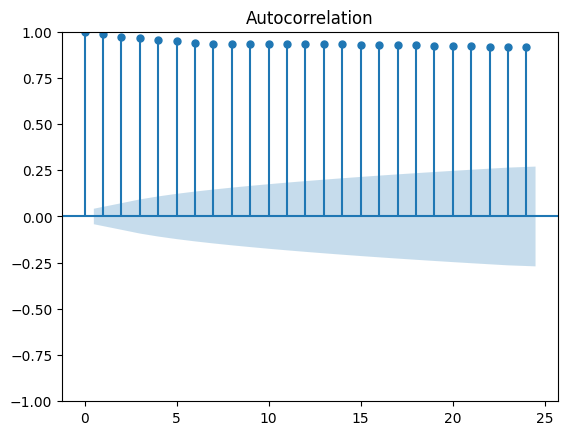

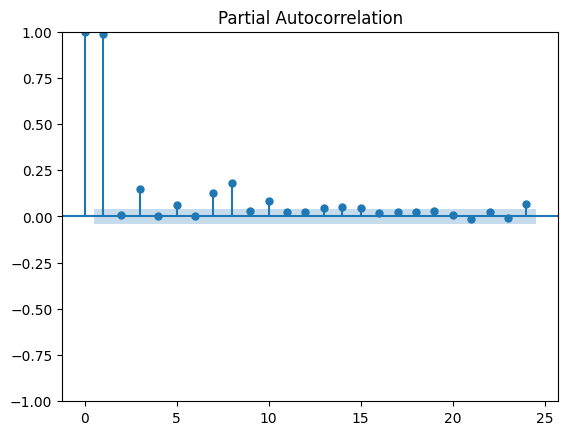

In [31]:
plot_acf(df['price'].dropna(), lags=24)
plot_pacf(df['price'].dropna(), lags=24)
plt.show()

## **Importing the train test split**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
y=df.drop(['price','Daily_Change'],axis=1)
x=df['price']

In [34]:
train_size= int(len(df)*0.8)
train_data=df[:train_size]
test_data=df[train_size:]

print(train_data.shape,test_data.shape)

(1745, 4) (437, 4)


In [37]:
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(train_data['price'],order=(1,1,1))
model_arima_fit=model_arima.fit()

# Forecast
forecast = model_arima_fit.forecast(steps=len(test_data))


In [38]:
y_pred=forecast

In [39]:
y_pred

,predicted_mean
1745,4545.310477
1746,4528.881470
1747,4539.258530
1748,4532.704063
1749,4536.844063
...,...
2177,4535.241403
2178,4535.241403
2179,4535.241403
2180,4535.241403


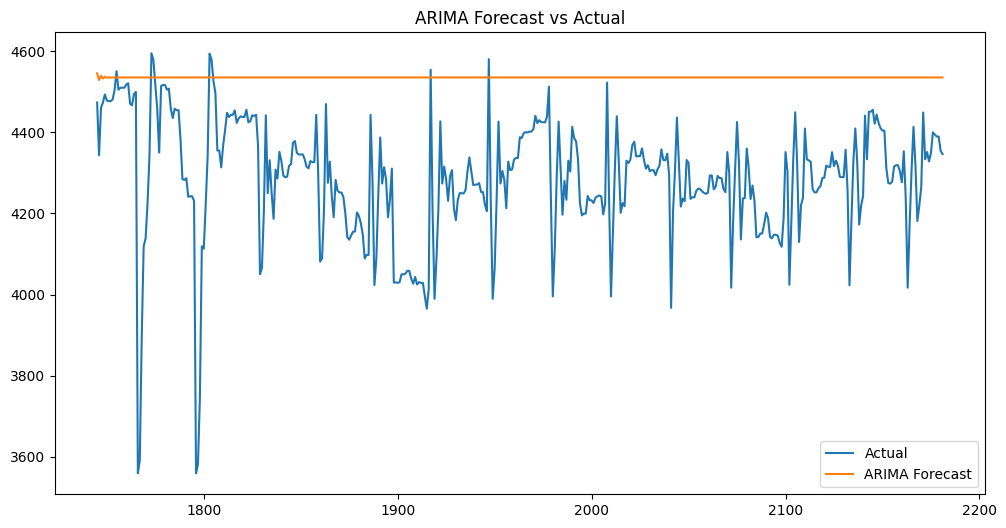

In [40]:
# Plot ARIMA results
plt.figure(figsize=(12,6))
# Plot the 'price' column from test_data against its index
plt.plot(test_data.index, test_data['price'], label='Actual')
plt.plot(test_data.index, forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [42]:
rmse = np.sqrt(mean_squared_error(test_data['price'], y_pred))
mae = mean_absolute_error(test_data['price'], y_pred)
mape = mean_absolute_percentage_error(test_data['price'], y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

RMSE: 290.5152104337602
MAE: 251.42444146136773
MAPE: 0.059977744697202406


In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
model_sarima = SARIMAX(train_data['price'], order=(1,1,1), seasonal_order=(1,1,1,30))
results_sarima = model_sarima.fit()


sarima_forecast = results_sarima.forecast(steps=len(test_data))

In [45]:
y_pred=sarima_forecast

In [46]:
last_original_date = pd.to_datetime(df['date'].iloc[-1])

# Define the end date for forecasting
end_date_forecast = pd.to_datetime('2022-12-31')


num_forecast_steps = (end_date_forecast - last_original_date).days
last_original_date = pd.to_datetime(df['date'].iloc[-1])

# Define the end date for forecasting
end_date_forecast = pd.to_datetime('2022-12-31')


num_forecast_steps = (end_date_forecast - last_original_date).days

# Now use the calculated number of steps in the forecast method
forecast_values = results_sarima.forecast(steps=num_forecast_steps)

In [47]:
print("\nGold Price Forecast for 2022:")
print(forecast_values)



Gold Price Forecast for 2022:
1745    4456.974037
1746    4422.902337
1747    4517.380172
1748    4526.398406
1749    4520.873664
           ...     
2115    5004.729791
2116    5008.284939
2117    4997.622702
2118    4992.014466
2119    4960.862834
Name: predicted_mean, Length: 375, dtype: float64


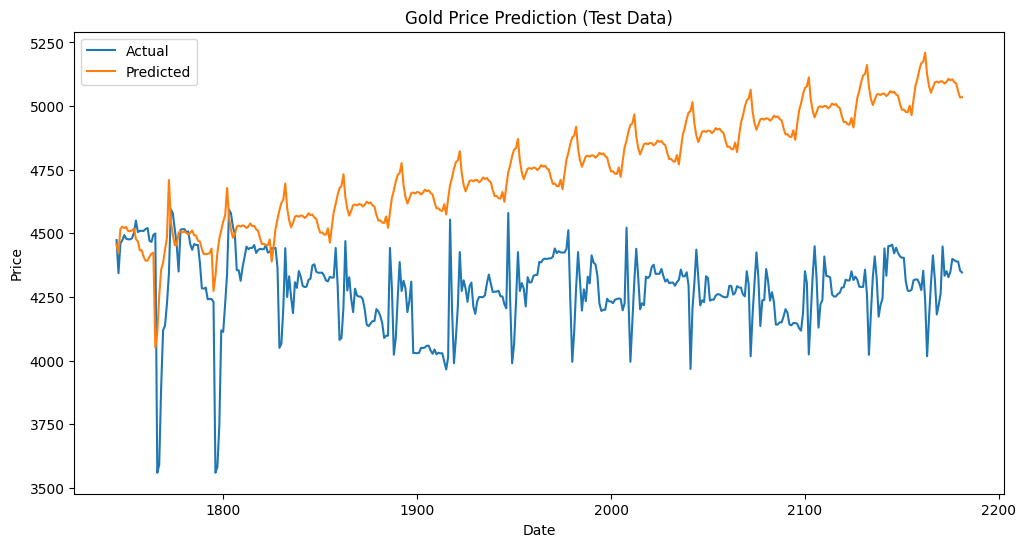

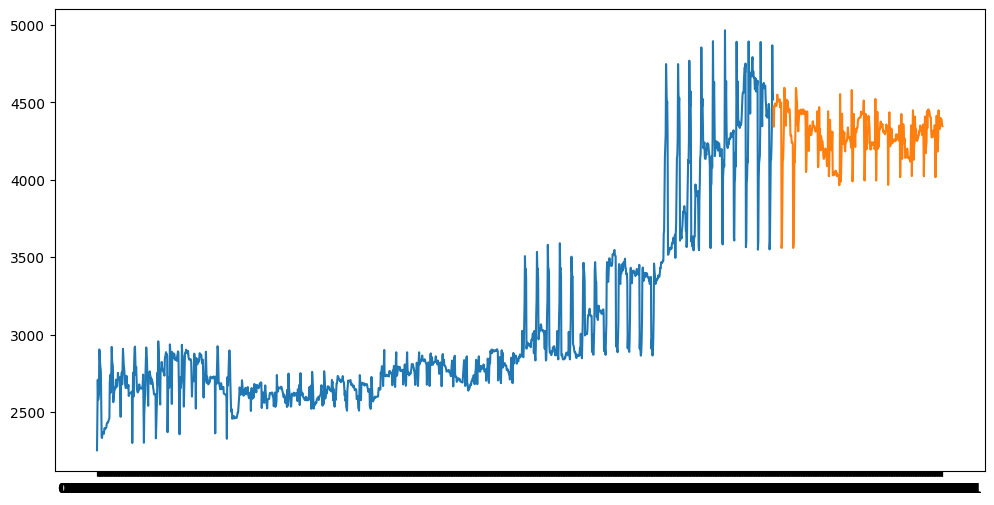

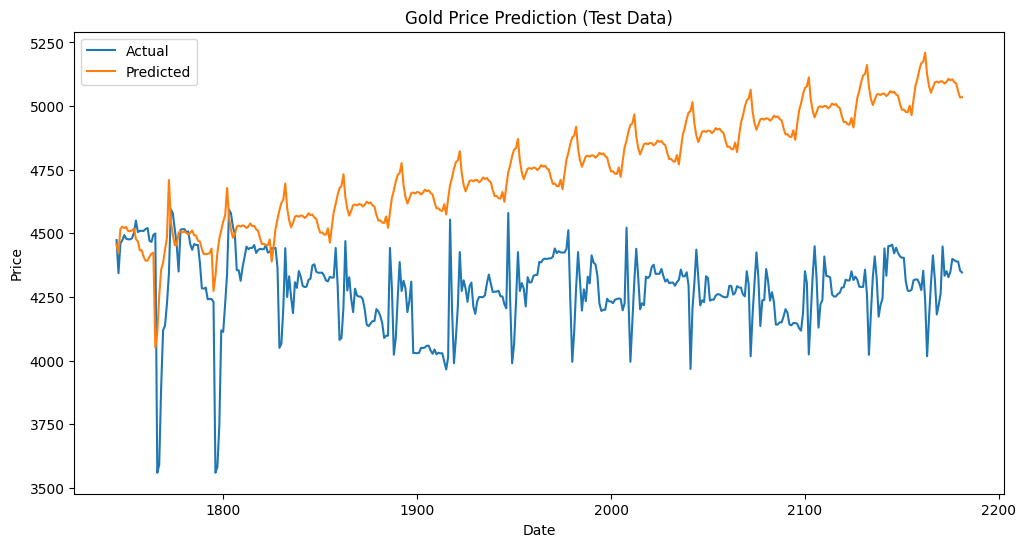

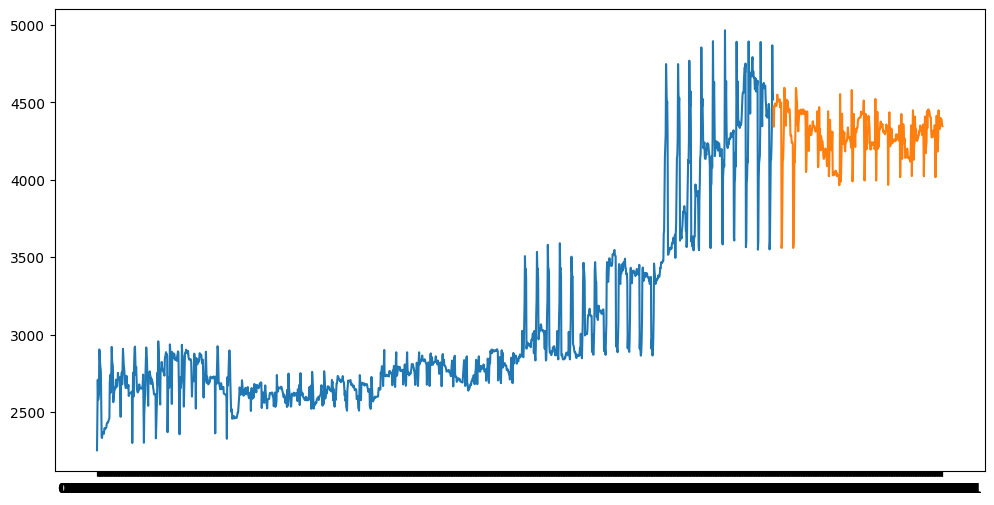

In [48]:
# Corrected plotting of Actual vs Predicted for the test data period
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['price'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted') # Assuming y_pred corresponds to test_data index
plt.title('Gold Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Get the last date from the 'date' column of the original DataFrame
# at the index corresponding to the end of the training data
last_train_date = pd.to_datetime(df['date'].iloc[train_size - 1])

forecast_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=len(forecast_values))
forecast_series = pd.Series(forecast_values.values, index=forecast_dates)


plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[:train_size], df['price'].iloc[:train_size], label='Historical Actual (Train)')
plt.plot(df['date'].iloc[train_size:], df['price'].iloc[train_size:], label='Historical Actual (Test)')

# Corrected plotting of Actual vs Predicted for the test data period
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['price'], label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted') # Assuming y_pred corresponds to test_data index
plt.title('Gold Price Prediction (Test Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Get the last date from the 'date' column of the original DataFrame
# at the index corresponding to the end of the training data
last_train_date = pd.to_datetime(df['date'].iloc[train_size - 1])

forecast_dates = pd.date_range(start=last_train_date + pd.Timedelta(days=1), periods=len(forecast_values))
forecast_series = pd.Series(forecast_values.values, index=forecast_dates)


plt.figure(figsize=(12, 6))
plt.plot(df['date'].iloc[:train_size], df['price'].iloc[:train_size], label='Historical Actual (Train)')
plt.plot(df['date'].iloc[train_size:], df['price'].iloc[train_size:], label='Historical Actual (Test)')

# Use the correctly created forecast_series for plotting
fig = px.line(forecast_series, x=forecast_series.index, y=forecast_series.values, labels={'x':'Date', 'y':'Price'}, title='Gold Price Forecast (2022)')
fig.update_traces(line_color='red')
fig.add_hline(y=df['price'].iloc[train_size-1], line_dash="dash", line_color="grey", annotation_text="Last Training Price", annotation_position="bottom right")
fig.show()

In [49]:
rmse = np.sqrt(mean_squared_error(test_data['price'], y_pred))
mae = mean_absolute_error(test_data['price'], y_pred)
mape = mean_absolute_percentage_error(test_data['price'], y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


RMSE: 536.8212293195994
MAE: 476.26815248280764
MAPE: 0.11244697885373063


In [50]:
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from keras.models import Sequential

In [51]:
numerical_data = df['price'].values.reshape(-1, 1)

scaler = MinMaxScaler()
# Apply the scaler to the numerical_data, not the entire 'data' DataFrame
scaled_data = scaler.fit_transform(numerical_data)

In [52]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df['price'], df.index, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1745,) (437,) (1745,) (437,)


In [54]:
LSTM_model = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)
lstm_pred = model.predict(X_test)

Epoch 1/10
1745/1745 - 6s - 3ms/step - loss: 998909.9375
Epoch 2/10
1745/1745 - 5s - 3ms/step - loss: 969037.2500
Epoch 3/10
1745/1745 - 5s - 3ms/step - loss: 940047.1250
Epoch 4/10
1745/1745 - 5s - 3ms/step - loss: 911848.8750
Epoch 5/10
1745/1745 - 5s - 3ms/step - loss: 884469.6875
Epoch 6/10
1745/1745 - 4s - 2ms/step - loss: 857871.9375
Epoch 7/10
1745/1745 - 5s - 3ms/step - loss: 831857.1875
Epoch 8/10
1745/1745 - 4s - 3ms/step - loss: 806641.1875
Epoch 9/10
1745/1745 - 4s - 2ms/step - loss: 782197.9375
Epoch 10/10
1745/1745 - 6s - 3ms/step - loss: 758520.6875
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [55]:
rmse = np.sqrt(mean_squared_error(test_data['price'], y_pred))
mae = mean_absolute_error(test_data['price'], y_pred)
mape = mean_absolute_percentage_error(test_data['price'], y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

RMSE: 536.8212293195994
MAE: 476.26815248280764
MAPE: 0.11244697885373063


In [56]:
df1=df.copy()


In [57]:
df1['date'].dtype==float

False

In [58]:
df['date'] = df['date'].astype(object)

In [59]:
df['date'].dtype

dtype('O')

In [60]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression

# Load and process data
data = pd.read_csv("/content/Gold_data.csv")

# Convert Date to datetime
data['date'] = pd.to_datetime(data['date'], format="%d-%m-%Y")

# Convert to number of days since start
data['days'] = (data['date'] - data['date'].min()).dt.days

# Features and target
X = data[['days']]
y = data['price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Save the model
with open("gold_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model trained and saved as gold_model.pkl")


Model trained and saved as gold_model.pkl


In [61]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

st.set_page_config(page_title="Gold Price Forecast", layout="wide")
st.title("📈 Gold Price Forecast using ARIMA")

uploaded_file = st.file_uploader("Upload your gold price CSV file", type=['csv'])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    df.columns = ['date', 'price']
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    st.subheader("📊 Raw Data")
    st.write(df.head())

    if df.isnull().sum().sum() > 0:
        st.warning("Missing values found!")
        df = df.dropna()

    st.subheader("🟡 Gold Price Over Time")
    st.line_chart(df['price'])

    st.subheader("📌 Price Distribution")
    fig, ax = plt.subplots()
    sns.histplot(df['price'], kde=True, color='orange', ax=ax)
    st.pyplot(fig)

    df['price_change'] = df['price'].diff()
    df['price_return'] = df['price'].pct_change() * 100
    df['MA7'] = df['price'].rolling(window=7).mean()
    df['MA14'] = df['price'].rolling(window=14).mean()
    df['volatility'] = df['price_return'].rolling(window=7).std()

    st.subheader("📉 Daily Return (%)")
    st.line_chart(df['price_return'])

    st.subheader("📈 Moving Averages")
    fig, ax = plt.subplots()
    df[['price', 'MA7', 'MA14']].plot(ax=ax)
    st.pyplot(fig)

    st.subheader("🔴 Rolling Volatility (7 Days)")
    st.line_chart(df['volatility'])

    monthly_change = df['price'].resample('M').last().diff()
    st.subheader("📅 Monthly Price Change")
    fig, ax = plt.subplots()
    monthly_change.plot(kind='bar', color='brown', ax=ax)
    st.pyplot(fig)

    test_ratio = 0.2
    split_index = int(len(df) * (1 - test_ratio))
    train = df['price'][:split_index]
    test = df['price'][split_index:]

    st.subheader("🔮 ARIMA Forecasting")
    model_arima = ARIMA(train, order=(1, 1, 1))
    model_arima_fit = model_arima.fit()
    forecast = model_arima_fit.forecast(steps=len(test))

    last_date = train.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(test))
    forecast_df = pd.DataFrame({'date': future_dates, 'forecast_price': forecast}).set_index('date')

    fig, ax = plt.subplots()
    train.plot(label='Historical Price', ax=ax)
    forecast_df.plot(label='Forecast', ax=ax, color='green')
    ax.set_title("Gold Price Forecast (Test Period)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()
    st.pyplot(fig)

    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    error_percentage = (rmse / df['price'].mean()) * 100
    accuracy = 100 - error_percentage

    st.markdown(f"""
        ### 🧪 Evaluation Metrics:
        - **Mean Squared Error (MSE):** `{mse:.2f}`
        - **Root MSE:** `{rmse:.2f}`
        - **Error %:** `{error_percentage:.2f}%`
        - **Model Accuracy:** `{accuracy:.2f}%`
    """)

    st.subheader("📉 Final Forecast vs Actual")
    fig, ax = plt.subplots()
    test.plot(label='Actual Price', ax=ax, color='gold')
    forecast.plot(label='Predicted Price', ax=ax, color='green')
    ax.legend()
    ax.set_title("ARIMA Model: Actual vs Predicted")
    st.pyplot(fig)
else:
    st.info("Please upload a CSV file with 'date' and 'price' columns to begin.")

2025-05-23 07:49:01.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 07:49:01.402 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 07:49:01.729 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-23 07:49:01.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 07:49:01.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 07:49:01.733 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 07:49:01.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn